In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 데이터를 보고 적절한 역치 값 설정
# 데이터 불러오기
df = pd.read_csv('./data/제품별_카테고리_비율.csv', encoding='utf-8')

C:\Users\smhrd\AppData\Local\Temp\ipykernel_8584\1661482996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['푹신한'], bins=100, kde=True)
c:\Users\smhrd\AppData\Local\Programs\Orange\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54393 (\N{HANGUL SYLLABLE PUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\smhrd\AppData\Local\Programs\Orange\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\smhrd\AppData\Local\Programs\Orange\Lib\site-package

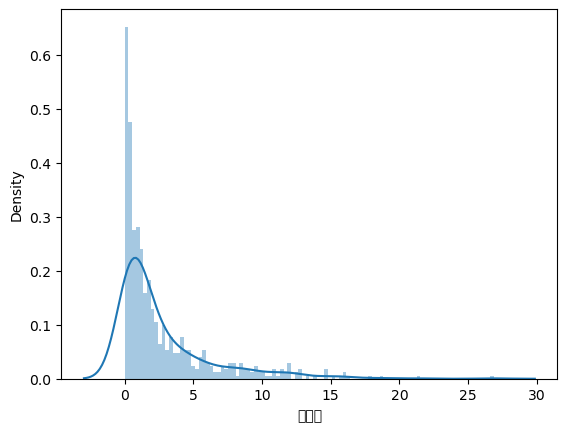

In [8]:
sns.distplot(df['푹신한'], bins=100, kde=True)
plt.show()

In [9]:
# 상위 25%의 비율을 가진 제품을 편하다고 판단
df['푹신한'].describe()

count    633.000000
mean       2.702401
std        3.595853
min        0.000000
25%        0.460000
50%        1.280000
75%        3.430000
max       26.890000
Name: 푹신한, dtype: float64

In [ ]:
# 각 컬럼의 상위 25% 비율 값 정리
df['편하다'].quantile(0.75)
# 편하다고 판단되는 제품의 비율을 가진 제품들만 추출
# db에 넣어둘지 아니면 꺼낼때 조건문 넣을지

37.57

In [7]:
df.columns

Index(['product_id', '편하다', '푹신한', '가벼운', '부드럽다', '딱딱하다', '이쁘다', '귀엽다', '깔끔하다',
       '모던한', '휘뚜루마뚜루', '크다', '정사이즈', '작다', '가성비', '내구성'],
      dtype='object')

In [4]:
threshold_list = [{column:df[column].quantile(0.5)} for column in df.columns[1:]]
threshold_list

[{'편한': 26.47},
 {'푹신한': 1.28},
 {'가벼운': 2.4},
 {'부드러운': 0.48},
 {'플랫한': 1.74},
 {'예쁜': 34.96},
 {'귀여운': 1.14},
 {'깔끔한': 2.19},
 {'모던한': 0.52},
 {'휘뚜루마뚜루': 17.95},
 {'발볼이 넓은': 14.14},
 {'발볼이 보통': 19.8},
 {'발볼이 좁은': 10.36},
 {'가격이 착한': 10.1},
 {'튼튼한': 3.12}]

In [ ]:
import pandas as pd

# 1. 파일 불러오기
df = pd.read_csv("./data/제품별_카테고리_비율.csv")

# 2. 카테고리별 상위 25% 기준값 수동 정의 (또는 자동 계산 가능)
threshold_dict = {
    '편하다': 37.57, '푹신한': 3.43, '가벼운': 5.5, '부드럽다': 1.07, '딱딱하다': 3.2,
    '이쁘다': 45.62, '귀엽다': 3.41, '깔끔하다': 3.96, '모던한': 1.09, '휘뚜루마뚜루': 24.65,
    '크다': 20.7, '정사이즈': 23.66, '작다': 15.47, '가성비': 17.41, '내구성': 5.35
}

# 3. 결과 DataFrame 준비
result_df = df[['product_id']].copy()

# 4. 각 카테고리별로 비율이 threshold 초과하면 'y', 아니면 'n'
for category, threshold in threshold_dict.items():
    result_df[category] = df[category].apply(lambda x: 'y' if x > threshold else 'n')

# 5. 결과 저장
result_df.to_csv("제품별_카테고리_상위50_여부_yn.csv", index=False)


In [ ]:
import pandas as pd

# 1. 파일 불러오기
df = pd.read_csv("제품별_카테고리_비율.csv")

# 2. 카테고리별 상위 50% 기준값 수동 정의 (또는 자동 계산 가능)
threshold_dict = {
    '편한': 26.47, '푹신한': 1.28, '가벼운': 2.4, '부드러운': 0.48, '딱딱한': 1.74,
    '예쁜': 34.96, '귀여운': 1.14, '깔끔한': 2.19, '모던한': 0.52, '휘뚜루마뚜루': 17.95,
    '발볼이 넓은': 14.14, '발볼이 보통': 19.8, '발볼이 좁은': 10.36, '가격이 착한': 10.1, '튼튼한': 3.12
}

# 3. 결과 DataFrame 준비
result_df = df[['product_id']].copy()

# 4. 각 카테고리별로 비율이 threshold 초과하면 'y', 아니면 'n'
for category, threshold in threshold_dict.items():
    result_df[category] = df[category].apply(lambda x: 'y' if x > threshold else 'n')

# 5. 결과 저장
result_df.to_csv("제품별_카테고리_상위50_여부_yn.csv", index=False)


In [ ]:
# 긍부정 라벨링

# predict-porba() 긍부정 점수 환산 함수

# 라이브러리 사용해서 긍부정 라벨링 진행하고 그 결과를 직접 확인하는 방법 채택
# KC-BERT

# 최종 점수 = 리뷰 감성 점수 + 제품 평점 + 리뷰 수(삭제가능)


# 발표 시 컨텐츠 기반 데이터 필터링했다!
# WORD-VECTOR, EMBEDDING




In [ ]:
# 상품별 Y에 해당하는 키워드 수 집계
df = pd.read_csv('./data/제품별_카테고리_상위25_여부_yn.csv', encoding='utf-8')

# 'product_id'를 제외한 모든 컬럼에서 'y' 값의 개수를 세서 새로운 컬럼 'Y_count'에 저장
df['Y_count'] = (df.drop(columns=['product_id']) == 'y').sum(axis=1)

# 결과 확인
df_sorted = df[['product_id', 'Y_count']].sort_values(by='Y_count', ascending=False)
df_sorted.to_csv('./data/상품별Y카테고리개수.csv', index=False, encoding='utf-8-sig')


In [31]:
# pd_group별 어떤 키워드가 가장 많이 나오는지
product_df = pd.read_csv("./data/product_list_전체신발_MFA.csv", encoding='utf-8')
df_yn = pd.read_csv("./data/제품별_카테고리_상위25_여부_yn.csv", encoding='utf-8')

# 먼저 두 파일을 병합하기 위해 'product_id'를 'id'로 맞춤
df_yn_renamed = df.rename(columns={'product_id': 'id'})

# 병합: 'id' 기준으로 product 정보와 YN 여부를 연결
merged_all = pd.merge(product_df[['id', 'group']], df_yn_renamed, on='id', how='inner')

# 카테고리 키워드 컬럼들만 추출
category_columns = df_yn_renamed.columns.drop('id')

# group별로 각 카테고리 키워드의 'y' 빈도 수 계산
group_category_counts = merged_all.groupby('group')[category_columns].apply(lambda x: (x == 'y').sum())

# 그룹명을 수동으로 추가 (파일 순서에 따라 일치한다고 가정)
group_names = ['구두', '부츠/워커', '샌들/슬리퍼', '스니커즈']
group_category_counts.insert(0, 'group', group_names)

group_category_counts.to_csv('./data/그룹별 키워드 빈도 수.csv', index=False, encoding='utf-8-sig')

